# データの重要性

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0

# 教師あり学習（分類）の例

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()　# データロード

In [3]:
X = data.data      # 特徴量。行列であり、慣例的に大文字
y = data.target   # 目的変数。ベクトルであり、慣例的に小文字

In [4]:
X = X[:, :10]　　# 先頭10列（平均値のみ抽出）

## 実装方法

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  # ロジスティック回帰

In [6]:
model.fit(X, y)  # fit() :　学習　引数に特徴量・目的変数

/Users/yk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_pred = model.predict(X) // predict() : 予測 引数に特徴量　予測結果をリターン

In [8]:
from sklearn.metrics import accuracy_score 
accuracy_score(y, y_pred) // 正解率の評価。通常別途の検証用データを使用する

0.9121265377855887

# 教師なし（クラスタリング）の例

In [9]:
from sklearn.datasets import load_wine
data = load_wine()

In [10]:
X = data.data[:, [0, 9]]  # ２つの列のみ使用する

## 実装方法

In [11]:
from sklearn.cluster import KMeans
n_clusters = 3 # 3つのクラスタに分けろ
model = KMeans(n_clusters=n_clusters) #K-means法。モデルの初期化のみ

In [12]:
pred = model.fit_predict(X) # 学習と予測同時に

## 結果の表示

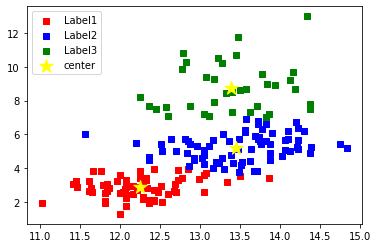

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X[pred==0, 0], X[pred==0, 1], color='red', marker='s', label='Label1')
ax.scatter(X[pred==1, 0], X[pred==1, 1], color='blue', marker='s', label='Label2')
ax.scatter(X[pred==2, 0], X[pred==2, 1], color='green', marker='s', label='Label3')
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, color='yellow', marker="*", label="center")
ax.legend()
plt.show()

# グラフの種類と書き方: Matplotlibを用いたグラフの表示方法

In [14]:
%matplotlib inline

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x1 = np.linspace(-5, 5, 101)
y1 = np.sin(x1)

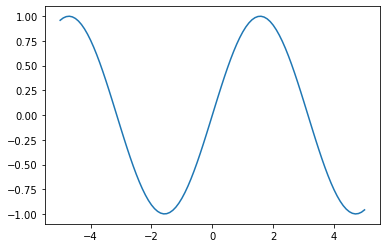

In [17]:
plt.plot(x1, y1)

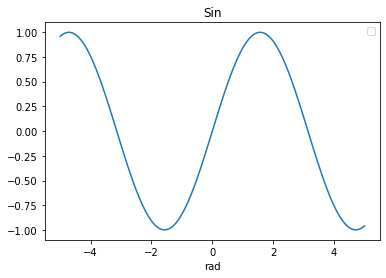

In [18]:
fig, ax = plt.subplots()
ax.set_title("Sin")
ax.set_xlabel("rad")
ax.plot(x1, y1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

## さまざまなグラフを書く

In [19]:
x2 = np.arange(100)
y2 = x2 * np.random.rand(100)

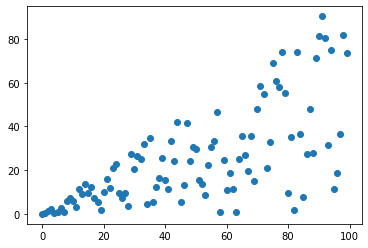

In [20]:
plt.scatter(x2, y2)

(array([47., 31.,  7.,  7.,  8.]),
 array([ 0.       , 18.0806772, 36.1613544, 54.2420316, 72.3227088,
        90.403386 ]),
 <BarContainer object of 5 artists>)

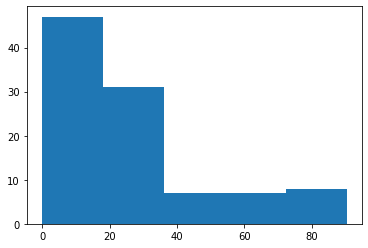

In [21]:
plt.hist(y2, bins=5)

<BarContainer object of 100 artists>

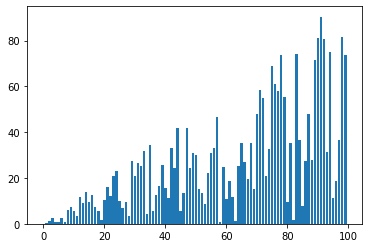

In [22]:
plt.bar(x2, y2)

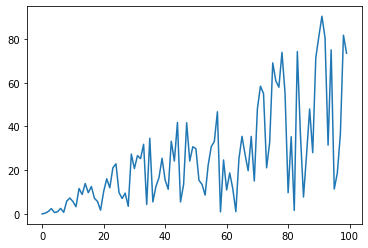

In [23]:
plt.plot(x2, y2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc8c88a1610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc8c88a1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc8c88a1280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8c88bd490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8c88bd820>],
 'means': []}

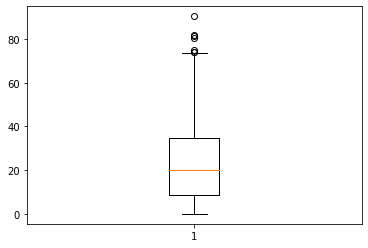

In [24]:
plt.boxplot(y2)

## ワインのデータセット

In [25]:
from sklearn.datasets import load_wine
data = load_wine()

In [26]:
x3 = data.data[:, [0]]
y3 = data.data[:, [9]]

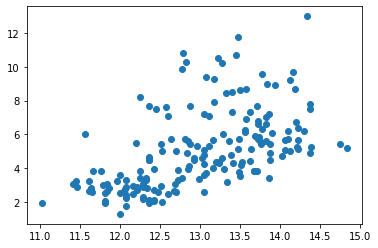

In [27]:
plt.scatter(x3, y3)

(array([58., 70., 30., 16.,  4.]),
 array([ 1.28 ,  3.624,  5.968,  8.312, 10.656, 13.   ]),
 <BarContainer object of 5 artists>)

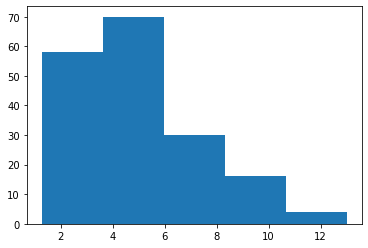

In [28]:
plt.hist(y3, bins=5)

# pandasを使ったデータの理解と加工

In [29]:
import pandas as pd

In [30]:
from sklearn.datasets import load_wine
data = load_wine()
df_X = pd.DataFrame(data.data, columns=data.feature_names)

In [31]:
df_X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [32]:
df_y = pd.DataFrame(data.target, columns=["kind(target)"])

In [33]:
df_y.head()

kind(target)
0             0
1             0
2             0
3             0
4             0

In [34]:
df = pd.concat([df_X, df_y], axis=1)

In [35]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  kind(target)  
0                          3.92   1065.0             0  
1                          3.40   1050.0             0  
2                          3.17   1185.0             0  
3                          3.45   1480.0             0  
4                          2.93    735.0             0

(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <BarContainer object of 10 artists>)

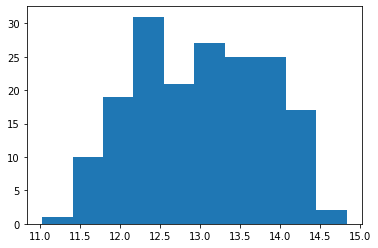

In [36]:
plt.hist(df.loc[:, "alcohol"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc8c80c12b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc8c80b9af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc8c80c1f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8c80b9eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8c80c6850>],
 'means': []}

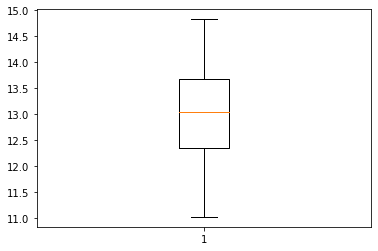

In [37]:
plt.boxplot(df.loc[:, "alcohol"])

In [38]:
df.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
kind(target)                 -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
kind(target)                           0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
kind(target)                   -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

In [39]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

       kind(target)  
count    178.000000  
mean       0.938202  
std        0.775035  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max        2.000000

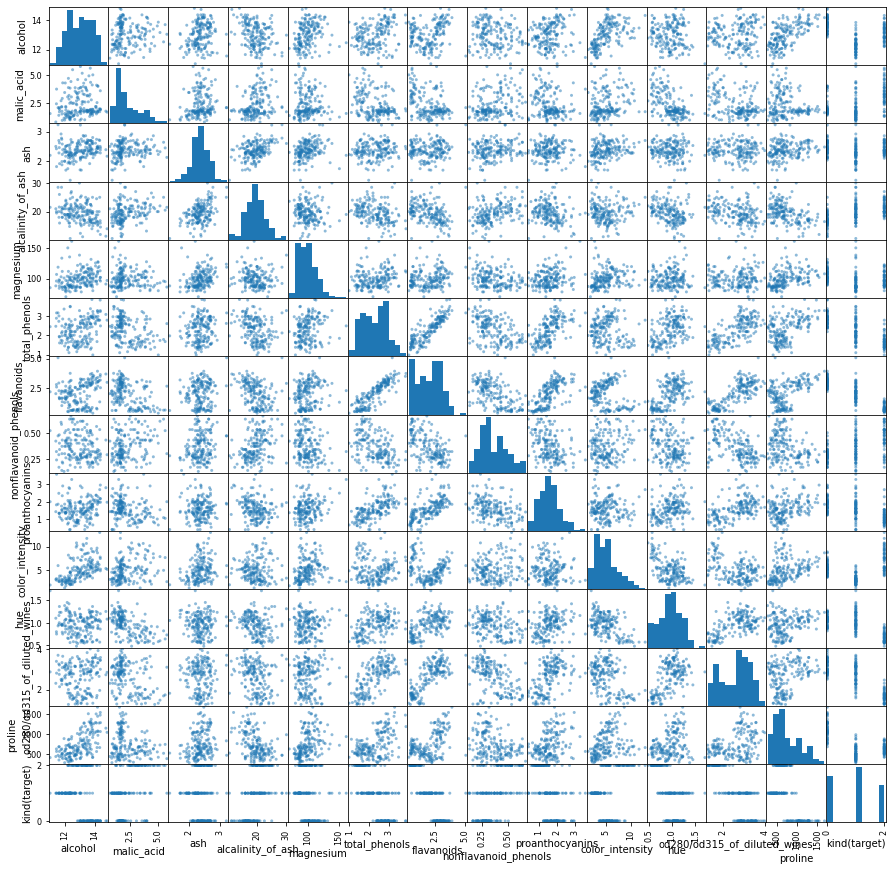

In [40]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df, figsize=(15, 15))

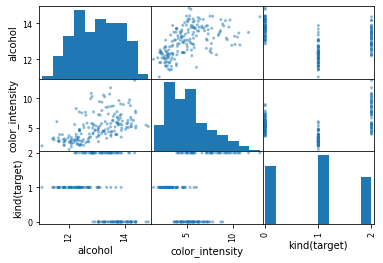

In [41]:
_ = scatter_matrix(df.iloc[:, [0, 9, -1]])